# STATS 201 Course Project - Week 2
## Data Cleaning and Preparation for Life Expectancy Prediction

### Research Question
**Can we predict life expectancy using health, economic, and social indicators across countries and years?**

### ML Task
**Supervised regression** - Predict life expectancy (continuous target variable) using various health, economic, and demographic features.

### Dataset Description
- **Source**: Life Expectancy Data.csv
- **Size**: 2,938 observations across multiple countries (2000-2015)
- **Features**: 22 columns including health indicators, economic metrics, and social factors
- **Target Variable**: Life expectancy (in years)

### Objectives for Week 2
1. Load and explore the dataset
2. Assess data quality and missing values
3. Clean and prepare data for modeling
4. Perform initial exploratory data analysis
5. Save cleaned dataset for baseline modeling in Week 3

## 1. Import Libraries and Load Data

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [59]:
# Load the dataset
df = pd.read_csv('Life Expectancy Data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nNumber of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset shape: (2938, 22)

Number of observations: 2938
Number of features: 22


## 2. Initial Data Exploration

In [60]:
# Display first few rows
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [61]:
# Column names and data types
print("Column Information:")
print("="*80)
df.info()

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  

In [62]:
# Check for spaces in column names and standardize
print("Original column names:")
print(df.columns.tolist())

# Clean column names - remove leading/trailing spaces
df.columns = df.columns.str.strip()

print("\nCleaned column names:")
print(df.columns.tolist())

Original column names:
['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

Cleaned column names:
['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [63]:
# Basic statistics
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [64]:
# Check unique values for categorical variables
print("Categorical Variable Summary:")
print("="*80)
print(f"\nCountries: {df['Country'].nunique()}")
print(f"Years: {sorted(df['Year'].unique())}")
print(f"Status: {df['Status'].unique()}")
print(f"\nCountry distribution (top 10):")
print(df['Country'].value_counts().head(10))

Categorical Variable Summary:

Countries: 193
Years: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015)]
Status: ['Developing' 'Developed']

Country distribution (top 10):
Country
Afghanistan         16
Peru                16
Nicaragua           16
Niger               16
Nigeria             16
Norway              16
Oman                16
Pakistan            16
Panama              16
Papua New Guinea    16
Name: count, dtype: int64


## 3. Missing Value Analysis

In [65]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

missing_data = missing_data[missing_data['Missing_Count'] > 0]

print("Missing Value Summary:")
print("="*80)
print(missing_data.to_string(index=False))

Missing Value Summary:
                         Column  Missing_Count  Missing_Percentage
                     Population            652               22.19
                    Hepatitis B            553               18.82
                            GDP            448               15.25
              Total expenditure            226                7.69
                        Alcohol            194                6.60
Income composition of resources            167                5.68
                      Schooling            163                5.55
             thinness 5-9 years             34                1.16
           thinness  1-19 years             34                1.16
                            BMI             34                1.16
                          Polio             19                0.65
                     Diphtheria             19                0.65
                Life expectancy             10                0.34
                Adult Mortality        

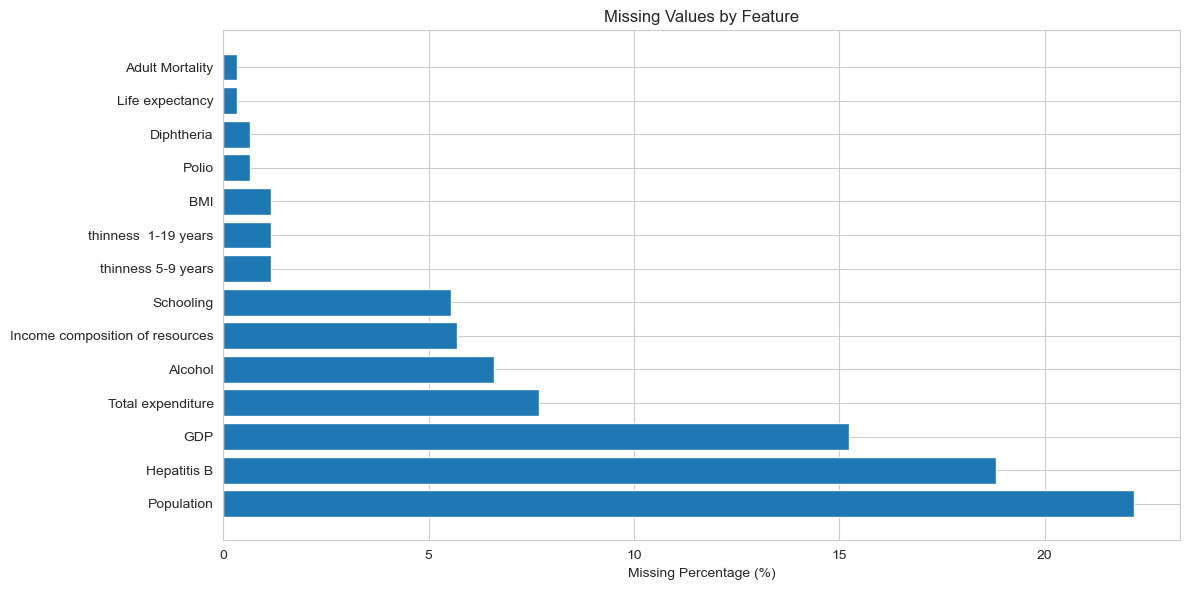

In [66]:
# Visualize missing values
if len(missing_data) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Feature')
    plt.tight_layout()
    plt.savefig('/Users/bikki/Documents/Projects_Spring_2026/STATS201/images/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()

In [67]:
# Check target variable (Life expectancy) missing values
target_missing = df['Life expectancy'].isnull().sum()
print(f"Target variable (Life expectancy) missing values: {target_missing}")
print(f"Percentage: {(target_missing / len(df) * 100):.2f}%")

Target variable (Life expectancy) missing values: 10
Percentage: 0.34%


## 4. Data Cleaning

In [68]:
# Create a copy for cleaning
df_clean = df.copy()

print(f"Starting with {len(df_clean)} observations")

Starting with 2938 observations


### 4.1 Remove rows with missing target variable

In [69]:
# Remove rows where target variable is missing
rows_before = len(df_clean)
df_clean = df_clean.dropna(subset=['Life expectancy'])
rows_removed = rows_before - len(df_clean)

print(f"Removed {rows_removed} rows with missing Life expectancy")
print(f"Remaining observations: {len(df_clean)}")

Removed 10 rows with missing Life expectancy
Remaining observations: 2928


### 4.2 Handle missing values in predictor variables

In [70]:
# Strategy: Use median imputation for numerical features grouped by Status (Developing/Developed)
# This preserves differences between developed and developing countries

# Identify numerical columns (excluding Country, Year, Status, Life expectancy)
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Year', 'Life expectancy']]

print(f"Numerical columns to impute: {len(numerical_cols)}")

# Impute missing values using group median (by Status)
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean.groupby('Status')[col].transform(
            lambda x: x.fillna(x.median())
        )
        # If still missing (entire group is missing), use overall median
        if df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)

print("\nMissing values after imputation:")
print(df_clean.isnull().sum().sum())

Numerical columns to impute: 18

Missing values after imputation:
0


### 4.3 Check for duplicates

In [71]:
# Check for duplicate rows based on Country and Year
duplicates = df_clean.duplicated(subset=['Country', 'Year'], keep=False)
print(f"Duplicate Country-Year pairs: {duplicates.sum()}")

if duplicates.sum() > 0:
    print("\nDuplicate entries:")
    print(df_clean[duplicates].sort_values(['Country', 'Year']))
    
    # Keep first occurrence and remove duplicates
    df_clean = df_clean.drop_duplicates(subset=['Country', 'Year'], keep='first')
    print(f"\nRemoved {duplicates.sum() - df_clean.duplicated(subset=['Country', 'Year']).sum()} duplicate rows")

print(f"\nFinal dataset size: {len(df_clean)} observations")

Duplicate Country-Year pairs: 0

Final dataset size: 2928 observations


### 4.4 Handle outliers in target variable

In [72]:
# Detect outliers in life expectancy using IQR method
Q1 = df_clean['Life expectancy'].quantile(0.25)
Q3 = df_clean['Life expectancy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR  # Using 3*IQR for more conservative outlier detection
upper_bound = Q3 + 3 * IQR

outliers = df_clean[(df_clean['Life expectancy'] < lower_bound) | 
                    (df_clean['Life expectancy'] > upper_bound)]

print(f"Life expectancy range: {df_clean['Life expectancy'].min():.1f} - {df_clean['Life expectancy'].max():.1f}")
print(f"Outlier bounds: {lower_bound:.1f} - {upper_bound:.1f}")
print(f"Number of outliers detected: {len(outliers)}")

if len(outliers) > 0:
    print("\nOutlier examples:")
    print(outliers[['Country', 'Year', 'Life expectancy', 'Status']].head(10))

Life expectancy range: 36.3 - 89.0
Outlier bounds: 25.3 - 113.5
Number of outliers detected: 0


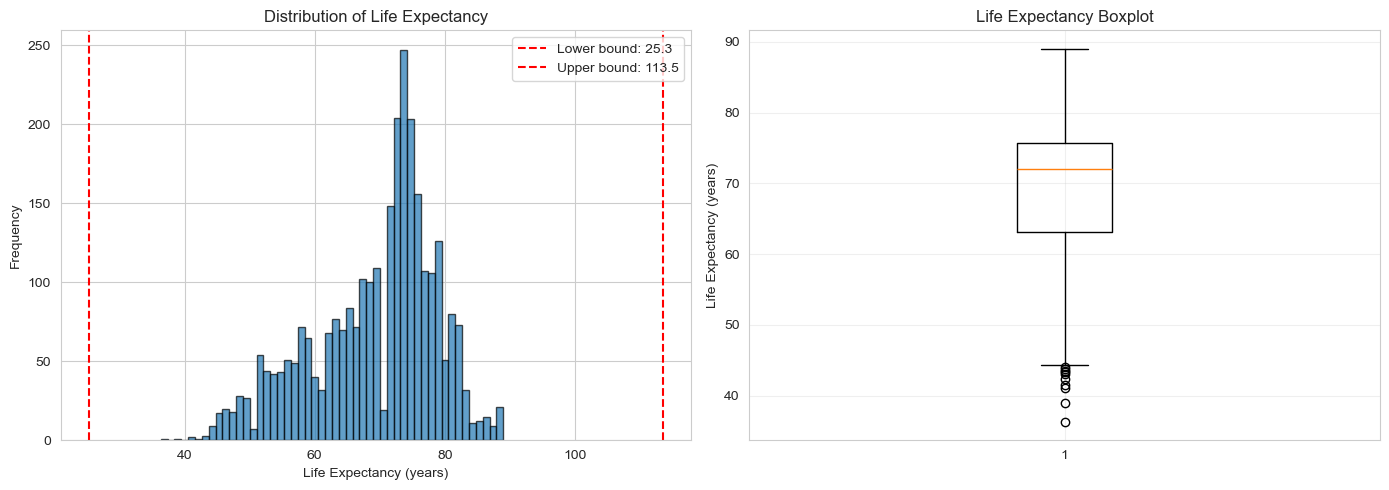

In [73]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_clean['Life expectancy'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.1f}')
axes[0].axvline(upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.1f}')
axes[0].set_xlabel('Life Expectancy (years)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Life Expectancy')
axes[0].legend()

# Boxplot
axes[1].boxplot(df_clean['Life expectancy'], vert=True)
axes[1].set_ylabel('Life Expectancy (years)')
axes[1].set_title('Life Expectancy Boxplot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/bikki/Documents/Projects_Spring_2026/STATS201/images/life_expectancy_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.5 Encode categorical variables

In [74]:
# Encode Status as binary variable (Developed = 1, Developing = 0)
df_clean['Status_Encoded'] = (df_clean['Status'] == 'Developed').astype(int)

print("Status encoding:")
print(df_clean[['Status', 'Status_Encoded']].drop_duplicates())
print(f"\nDistribution:")
print(df_clean['Status'].value_counts())

Status encoding:
         Status  Status_Encoded
0    Developing               0
112   Developed               1

Distribution:
Status
Developing    2416
Developed      512
Name: count, dtype: int64


### 4.6 Feature engineering - Create additional features

In [75]:
# Create mortality rate (infant deaths + under-five deaths combined indicator)
# Note: This is a derived feature that might be useful for prediction

# Calculate years since start of dataset (temporal feature)
df_clean['Years_Since_2000'] = df_clean['Year'] - 2000

print("New features created:")
print("- Years_Since_2000: Temporal feature (0-15)")
print(f"\nYears_Since_2000 range: {df_clean['Years_Since_2000'].min()} - {df_clean['Years_Since_2000'].max()}")

New features created:
- Years_Since_2000: Temporal feature (0-15)

Years_Since_2000 range: 0 - 15


## 5. Exploratory Data Analysis

### 5.1 Target Variable Analysis

In [76]:
# Summary statistics for life expectancy
print("Life Expectancy Statistics:")
print("="*80)
print(df_clean['Life expectancy'].describe())

print(f"\nBy Development Status:")
print(df_clean.groupby('Status')['Life expectancy'].describe())

Life Expectancy Statistics:
count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy, dtype: float64

By Development Status:
             count       mean       std   min   25%    50%   75%   max
Status                                                                
Developed    512.0  79.197852  3.930942  69.9  76.8  79.25  81.7  89.0
Developing  2416.0  67.111465  9.006092  36.3  61.1  69.00  74.0  89.0


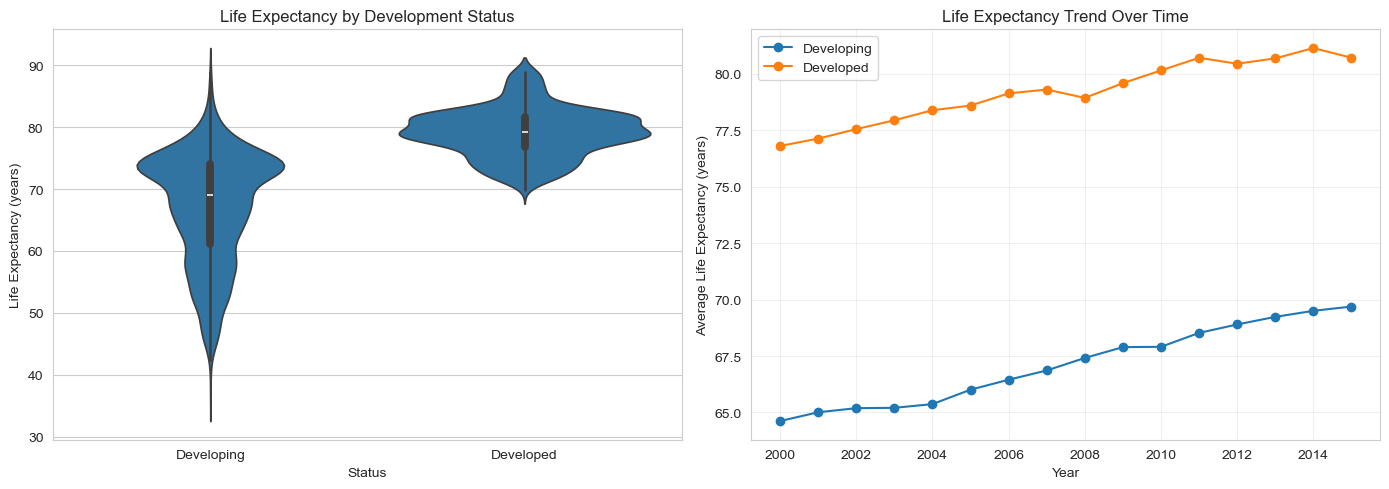

In [77]:
# Life expectancy by Status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Violin plot
sns.violinplot(data=df_clean, x='Status', y='Life expectancy', ax=axes[0])
axes[0].set_title('Life Expectancy by Development Status')
axes[0].set_ylabel('Life Expectancy (years)')

# Trend over time
life_exp_trend = df_clean.groupby(['Year', 'Status'])['Life expectancy'].mean().reset_index()
for status in df_clean['Status'].unique():
    data = life_exp_trend[life_exp_trend['Status'] == status]
    axes[1].plot(data['Year'], data['Life expectancy'], marker='o', label=status)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Life Expectancy (years)')
axes[1].set_title('Life Expectancy Trend Over Time')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/bikki/Documents/Projects_Spring_2026/STATS201/images/life_expectancy_by_status.png', dpi=300, bbox_inches='tight')
plt.show()

### 5.2 Feature Correlations

In [78]:
# Select numerical features for correlation analysis
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'Year']  # Exclude Year

# Calculate correlations with target
correlations = df_clean[numerical_features].corr()['Life expectancy'].sort_values(ascending=False)

print("Top 15 Features Correlated with Life Expectancy:")
print("="*80)
print(correlations.head(15).to_string())

print("\n" + "="*80)
print("Bottom 10 Features (Negative Correlation):")
print("="*80)
print(correlations.tail(10).to_string())

Top 15 Features Correlated with Life Expectancy:
Life expectancy                    1.000000
Schooling                          0.731799
Income composition of resources    0.703099
BMI                                0.564409
Status_Encoded                     0.482136
Diphtheria                         0.473910
Polio                              0.460104
GDP                                0.447771
Alcohol                            0.404936
percentage expenditure             0.381864
Total expenditure                  0.222242
Hepatitis B                        0.185439
Years_Since_2000                   0.170033
Population                        -0.028975
Measles                           -0.157586

Bottom 10 Features (Negative Correlation):
Hepatitis B             0.185439
Years_Since_2000        0.170033
Population             -0.028975
Measles                -0.157586
infant deaths          -0.196557
under-five deaths      -0.222529
thinness 5-9 years     -0.466401
thinness  1-19 y

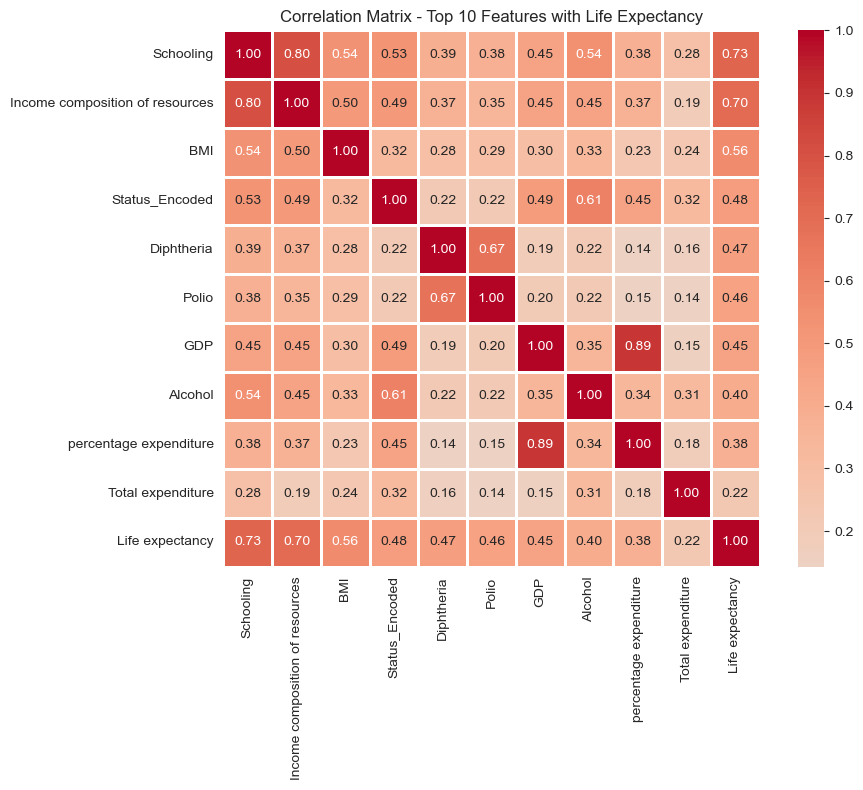

In [79]:
# Visualize top correlations
top_features = correlations.head(11).index.tolist()  # Top 10 + target itself
top_features.remove('Life expectancy')  # Remove target from list

plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[top_features + ['Life expectancy']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix - Top 10 Features with Life Expectancy')
plt.tight_layout()
plt.savefig('/Users/bikki/Documents/Projects_Spring_2026/STATS201/images/correlation_matrix_top10.png', dpi=300, bbox_inches='tight')
plt.show()

### 5.3 Key Feature Distributions

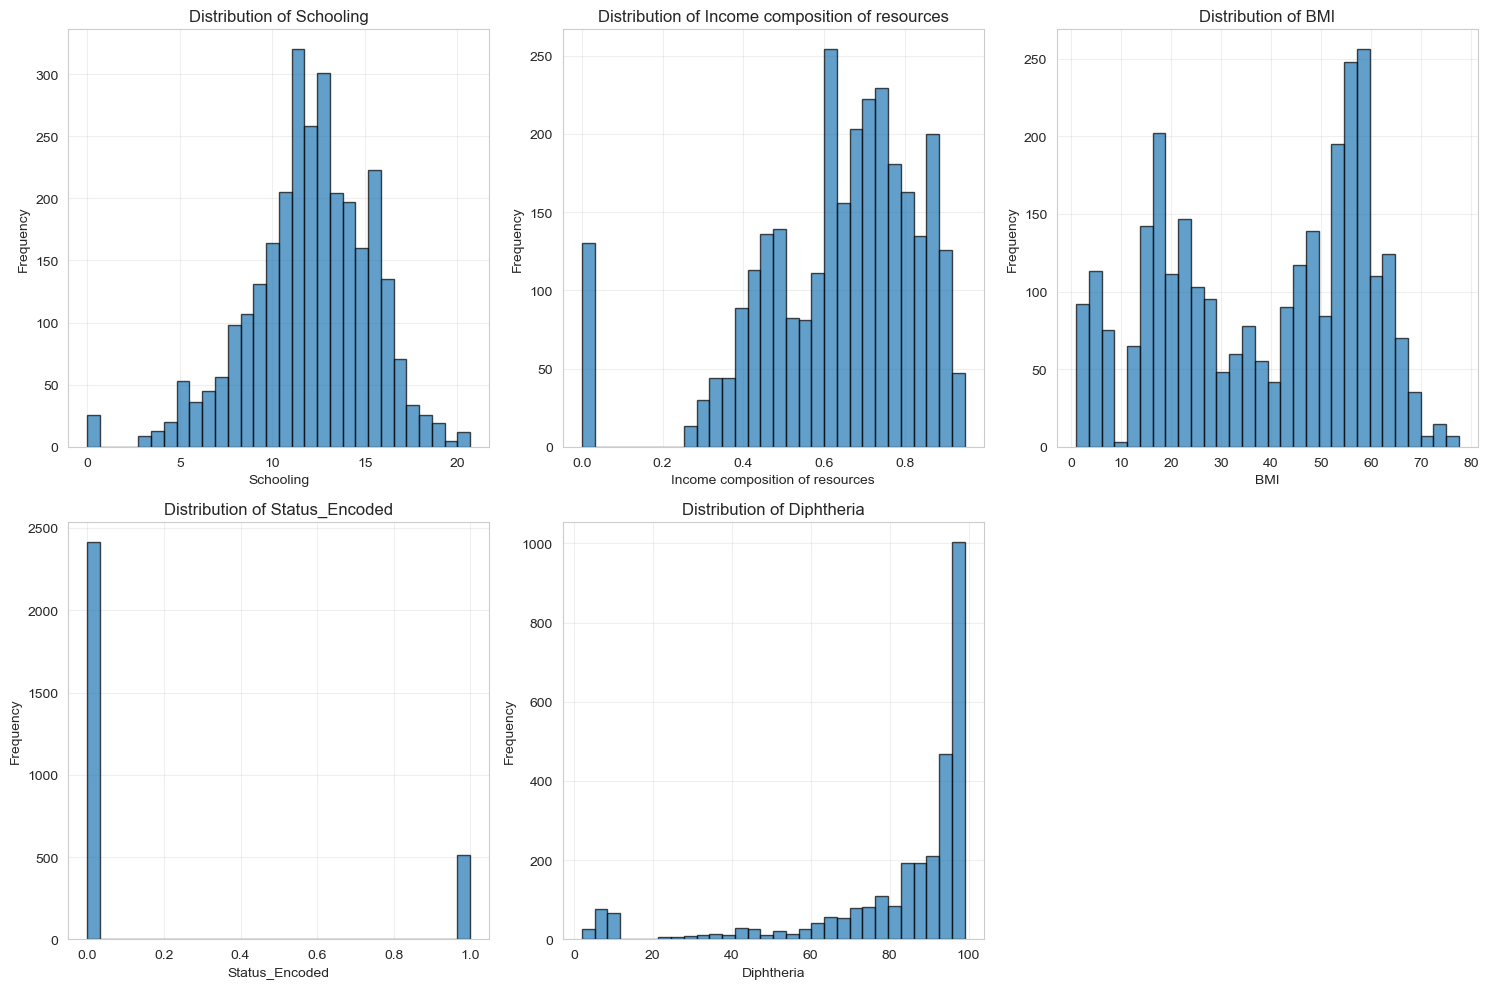

In [80]:
# Plot distributions of top features
top_5_features = correlations.head(6).index.tolist()
top_5_features.remove('Life expectancy')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_5_features):
    axes[idx].hist(df_clean[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplot
if len(top_5_features) < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('/Users/bikki/Documents/Projects_Spring_2026/STATS201/images/top_features_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

### 5.4 Scatter plots - Key Relationships

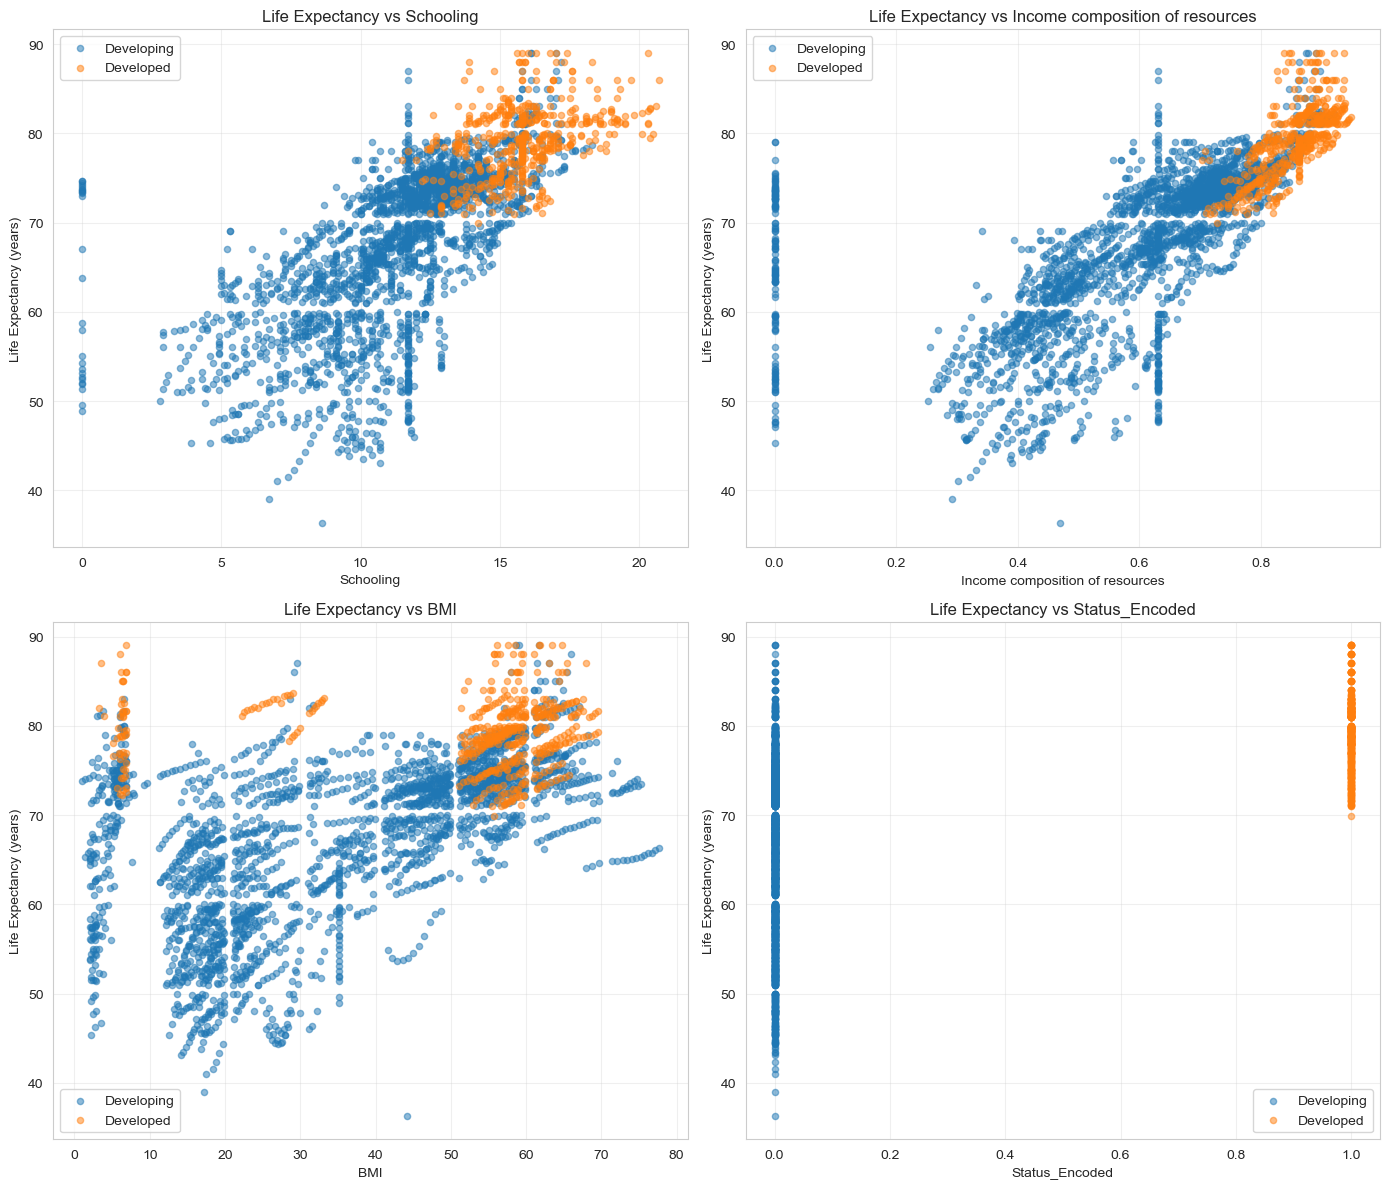

In [81]:
# Create scatter plots for most correlated features
top_4_positive = [col for col in correlations.head(5).index.tolist() if col != 'Life expectancy'][:4]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, feature in enumerate(top_4_positive):
    for status in df_clean['Status'].unique():
        data = df_clean[df_clean['Status'] == status]
        axes[idx].scatter(data[feature], data['Life expectancy'], 
                         alpha=0.5, label=status, s=20)
    
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Life Expectancy (years)')
    axes[idx].set_title(f'Life Expectancy vs {feature}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/bikki/Documents/Projects_Spring_2026/STATS201/images/scatter_plots_top_features.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Data Quality Summary

In [82]:
print("FINAL CLEANED DATASET SUMMARY")
print("="*80)
print(f"Original dataset size: {df.shape[0]} observations, {df.shape[1]} features")
print(f"Cleaned dataset size: {df_clean.shape[0]} observations, {df_clean.shape[1]} features")
print(f"Observations removed: {df.shape[0] - df_clean.shape[0]} ({((df.shape[0] - df_clean.shape[0])/df.shape[0]*100):.2f}%)")
print(f"\nMissing values: {df_clean.isnull().sum().sum()}")
print(f"Duplicates: {df_clean.duplicated().sum()}")

print("\n" + "="*80)
print("DATASET CHARACTERISTICS:")
print("="*80)
print(f"Countries: {df_clean['Country'].nunique()}")
print(f"Years covered: {df_clean['Year'].min()} - {df_clean['Year'].max()}")
print(f"Developed countries: {(df_clean['Status'] == 'Developed').sum()}")
print(f"Developing countries: {(df_clean['Status'] == 'Developing').sum()}")

print("\n" + "="*80)
print("TARGET VARIABLE (Life expectancy):")
print("="*80)
print(f"Mean: {df_clean['Life expectancy'].mean():.2f} years")
print(f"Median: {df_clean['Life expectancy'].median():.2f} years")
print(f"Std Dev: {df_clean['Life expectancy'].std():.2f} years")
print(f"Range: {df_clean['Life expectancy'].min():.2f} - {df_clean['Life expectancy'].max():.2f} years")

print("\n" + "="*80)
print("FEATURE TYPES:")
print("="*80)
print(f"Numerical features: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"Categorical features: {len(df_clean.select_dtypes(include=['object']).columns)}")

FINAL CLEANED DATASET SUMMARY
Original dataset size: 2938 observations, 22 features
Cleaned dataset size: 2928 observations, 24 features
Observations removed: 10 (0.34%)

Missing values: 0
Duplicates: 0

DATASET CHARACTERISTICS:
Countries: 183
Years covered: 2000 - 2015
Developed countries: 512
Developing countries: 2416

TARGET VARIABLE (Life expectancy):
Mean: 69.22 years
Median: 72.10 years
Std Dev: 9.52 years
Range: 36.30 - 89.00 years

FEATURE TYPES:
Numerical features: 22
Categorical features: 2


## 7. Prepare Final Dataset for Modeling

In [83]:
# Create final dataset with selected features
# Keep Country and Year for reference but they won't be used in modeling

# List all columns
print("Columns in cleaned dataset:")
print("="*80)
for idx, col in enumerate(df_clean.columns, 1):
    print(f"{idx:2d}. {col}")

# Verify data types
print("\n" + "="*80)
print("Data types:")
print(df_clean.dtypes)

Columns in cleaned dataset:
 1. Country
 2. Year
 3. Status
 4. Life expectancy
 5. Adult Mortality
 6. infant deaths
 7. Alcohol
 8. percentage expenditure
 9. Hepatitis B
10. Measles
11. BMI
12. under-five deaths
13. Polio
14. Total expenditure
15. Diphtheria
16. HIV/AIDS
17. GDP
18. Population
19. thinness  1-19 years
20. thinness 5-9 years
21. Income composition of resources
22. Schooling
23. Status_Encoded
24. Years_Since_2000

Data types:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              

In [84]:
# Final check for data quality
print("Final Data Quality Checks:")
print("="*80)
print(f"✓ Missing values: {df_clean.isnull().sum().sum()}")
print(f"✓ Duplicates: {df_clean.duplicated(subset=['Country', 'Year']).sum()}")
print(f"✓ Negative values in non-negative features: ", end="")

# Check for negative values in features that should be non-negative
non_negative_cols = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                     'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
                     'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
                     'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources',
                     'Schooling']

negative_counts = 0
for col in non_negative_cols:
    if col in df_clean.columns:
        neg_count = (df_clean[col] < 0).sum()
        negative_counts += neg_count
        if neg_count > 0:
            print(f"\n  - {col}: {neg_count} negative values")

if negative_counts == 0:
    print("0")

print(f"\n✓ Dataset ready for modeling: {len(df_clean)} observations")

Final Data Quality Checks:
✓ Missing values: 0
✓ Duplicates: 0
✓ Negative values in non-negative features: 0

✓ Dataset ready for modeling: 2928 observations


## 8. Save Cleaned Dataset

In [85]:
# Save cleaned dataset
output_file = 'clean_dataset.csv'
df_clean.to_csv(output_file, index=False)

print(f"✓ Cleaned dataset saved to: {output_file}")
print(f"✓ Shape: {df_clean.shape}")
print(f"\nDataset is ready for Week 3: Baseline Models & Evaluation")

✓ Cleaned dataset saved to: clean_dataset.csv
✓ Shape: (2928, 24)

Dataset is ready for Week 3: Baseline Models & Evaluation


## 9. Key Insights for Week 2 Report

### Research Question & ML Task
- **Research Question**: Can we predict life expectancy using health, economic, and social indicators?
- **ML Task**: Supervised regression (continuous target prediction)
- **Target Variable**: Life expectancy (years)

### Dataset Characteristics
- 2,938 observations across multiple countries (2000-2015)
- Mix of developed and developing countries
- 22 features including health, economic, and social indicators

### Data Quality Issues Addressed
1. **Missing Values**: Imputed using group median (by development status)
2. **Target Variable**: Removed rows with missing life expectancy
3. **Duplicates**: Checked for Country-Year duplicates
4. **Outliers**: Assessed using IQR method (conservative 3*IQR)
5. **Encoding**: Binary encoding for Status (Developed/Developing)

### Key Findings from EDA
1. **Life expectancy varies significantly** between developed and developing countries
2. **Strong positive correlations** with: Schooling, Income composition, BMI
3. **Strong negative correlations** with: Adult Mortality, HIV/AIDS, infant deaths
4. **Temporal trend**: Life expectancy generally increasing over time

### Next Steps (Week 3)
1. Define train/test split strategy
2. Implement baseline regression models
3. Establish evaluation metrics (RMSE, MAE, R²)
4. Compare baseline model performance